# Import Data

In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

train_df = pd.read_csv('../../input/feedback-prize-effectiveness/train.csv')
stack_df = pd.read_csv('../../99_Ensemble/99_v1_02/result/stack_99_v1_02_27.csv')

train_df = train_df[['discourse_id']].merge(stack_df, on='discourse_id', how='left')
print(train_df.shape)
train_df.head()

(36765, 28)


,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,Ineffective_0,Adequate_0,Effective_0,label,loss,...,Effective_3,Ineffective_4,Adequate_4,Effective_4,Ineffective_5,Adequate_5,Effective_5,Ineffective,Adequate,Effective
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,0.002175,0.152980,0.011512,1,0.085691,...,0.003841,0.013028,0.149802,0.003837,0.013616,0.150725,0.002326,0.044812,0.919796,0.035392
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,0.009333,0.152729,0.004605,1,0.087332,...,0.006511,0.008662,0.154979,0.003025,0.026612,0.136538,0.003517,0.091948,0.881701,0.026351
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,0.023451,0.141358,0.001857,1,0.164698,...,0.005504,0.029492,0.135902,0.001273,0.048600,0.115757,0.002310,0.172267,0.812169,0.015564
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,0.055733,0.109495,0.001439,1,0.420119,...,0.002196,0.032678,0.132563,0.001426,0.056640,0.108651,0.001375,0.236727,0.752566,0.010708
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,0.041290,0.124674,0.000703,1,0.290297,...,0.001962,0.054301,0.111310,0.001056,0.070796,0.094933,0.000937,0.317408,0.675184,0.007408


# Features

In [2]:
train_df["essay_text"] = train_df["essay_id"].apply(lambda x: open(f'../../input/feedback-prize-effectiveness/train/{x}.txt').read())

In [3]:
import numpy as np
import string
from nltk.corpus import stopwords

def text_features(df, col):
    print(f"{col}_num_words...")
    df[f"{col}_num_words"] = df[col].progress_apply(lambda x: len(str(x).split()))
    
    print(f"{col}_num_unique_words...")
    df[f"{col}_num_unique_words"] = df[col].progress_apply(lambda x: len(set(str(x).split())))
    
    print(f"{col}_num_chars...")
    df[f"{col}_num_chars"] = df[col].progress_apply(lambda x: len(str(x)))
    
    print(f"{col}_num_stopwords...")
    df[f"{col}_num_stopwords"] = df[col].progress_apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords.words('english')]))
    
    print(f"{col}_num_punctuations...")
    df[f"{col}_num_punctuations"] = df[col].progress_apply(lambda x: len([c for c in str(x) if c in list(string.punctuation)]))
    
    print(f"{col}_num_words_upper...")
    df[f"{col}_num_words_upper"] = df[col].progress_apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
    
    print(f"{col}_num_words_title...")
    df[f"{col}_num_words_title"] = df[col].progress_apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    
    print(f"{col}_mean_word_len...")
    df[f"{col}_mean_word_len"] = df[col].progress_apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    
    print(f"{col}_num_paragraphs...")
    df[f"{col}_num_paragraphs"] = df[col].progress_apply(lambda x: len(x.split('\n\n')))
    
    #print(f"{col}_polarity...")
    #df[f"{col}_polarity"] = df[col].progress_apply(lambda x: TextBlob(x).sentiment[0])
    
    #print(f"{col}_subjectivity...")
    #df[f"{col}_subjectivity"] = df[col].progress_apply(lambda x: TextBlob(x).sentiment[1])
    
    #print(f'{col}_nn_count',f'{col}_pr_count',f'{col}_vb_count',f'{col}_jj_count',f'{col}_uh_count',f'{col}_cd_count...')
    #df[[f'{col}_nn_count',f'{col}_pr_count',f'{col}_vb_count',f'{col}_jj_count',f'{col}_uh_count',f'{col}_cd_count']] = df[col].progress_apply(pos_count)
    return df

In [4]:
discourse_train = train_df[['discourse_id','discourse_text']].copy()
discourse_train.drop_duplicates(inplace=True)
print(f"discourse_train: {discourse_train.shape}")

discourse_train = text_features(discourse_train, "discourse_text")
discourse_train.head()

 53%|█████▎    | 19370/36765 [00:00<00:00, 193695.57it/s]

discourse_train: (36765, 2)
discourse_text_num_words...
discourse_text_num_unique_words...


  0%|          | 31/36765 [00:00<01:58, 309.01it/s]

discourse_text_num_chars...
discourse_text_num_stopwords...


  2%|▏         | 667/36765 [00:00<00:05, 6667.64it/s]

discourse_text_num_punctuations...


  0%|          | 0/36765 [00:00<?, ?it/s]

discourse_text_num_words_upper...
discourse_text_num_words_title...


 18%|█▊        | 6619/36765 [00:00<00:00, 66185.80it/s]

discourse_text_mean_word_len...


100%|██████████| 36765/36765 [00:00<00:00, 1126272.41it/s]

discourse_text_num_paragraphs...


,discourse_id,discourse_text,discourse_text_num_words,discourse_text_num_unique_words,discourse_text_num_chars,discourse_text_num_stopwords,discourse_text_num_punctuations,discourse_text_num_words_upper,discourse_text_num_words_title,discourse_text_mean_word_len,discourse_text_num_paragraphs
0,0013cc385424,"Hi, i'm Isaac, i'm going to be writing about h...",67,43,317,37,9,2,7,3.731343,1
1,9704a709b505,"On my perspective, I think that the face is a ...",41,29,210,25,4,3,6,4.121951,1
2,c22adee811b6,I think that the face is a natural landform be...,21,19,105,13,0,1,2,4.000000,1
3,a10d361e54e4,"If life was on Mars, we would know by now. The...",72,54,362,38,13,1,8,4.027778,1
4,db3e453ec4e2,People thought that the face was formed by ali...,18,15,101,10,1,0,2,4.611111,1


In [5]:
essay_train = train_df[['essay_id','essay_text']].copy()
essay_train.drop_duplicates(inplace=True)
print(f"essay_train: {essay_train.shape}")

essay_train = text_features(essay_train, "essay_text")
essay_train.head()

  0%|          | 0/4191 [00:00<?, ?it/s]

essay_train: (4191, 2)
essay_text_num_words...


 67%|██████▋   | 2810/4191 [00:00<00:00, 28087.37it/s]

essay_text_num_unique_words...


  0%|          | 0/4191 [00:00<?, ?it/s]

essay_text_num_chars...
essay_text_num_stopwords...


  2%|▏         | 85/4191 [00:00<00:04, 848.67it/s]

essay_text_num_punctuations...


  0%|          | 0/4191 [00:00<?, ?it/s]

essay_text_num_words_upper...
essay_text_num_words_title...


 80%|████████  | 3361/4191 [00:00<00:00, 16862.07it/s]

essay_text_mean_word_len...


100%|██████████| 4191/4191 [00:00<00:00, 442957.57it/s]

essay_text_num_paragraphs...


,essay_id,essay_text,essay_text_num_words,essay_text_num_unique_words,essay_text_num_chars,essay_text_num_stopwords,essay_text_num_punctuations,essay_text_num_words_upper,essay_text_num_words_title,essay_text_mean_word_len,essay_text_num_paragraphs
0,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",351,147,1816,188,46,10,44,4.128205,5
9,00944C693682,Limiting the usage of cars has personal and pr...,874,483,5021,385,171,0,64,4.735698,6
20,00BD97EA4041,Should computers read the emotional expression...,276,177,1643,129,40,3,29,4.931159,6
27,00C6E82FE5BA,I think that it wouldn't be valueable to have ...,297,159,1574,149,23,4,10,4.296296,3
33,013B9AA6B9DB,"What is that thing on Mars?\n\nWell, some peop...",219,123,1156,110,31,1,27,4.269406,4


In [8]:
discourse_cols = [col for col in discourse_train.columns if col.startswith('discourse') and col!='discourse_text']
essay_cols = [col for col in essay_train.columns if col.startswith('essay') and col!='essay_text']

train_df = train_df.merge(discourse_train[discourse_cols], on='discourse_id', how='left')
train_df = train_df.merge(essay_train[essay_cols], on='essay_id', how='left')

print(f"train_df: {train_df.shape}")
train_df.head()

train_df: (36765, 48)


,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,Ineffective_0,Adequate_0,Effective_0,label,loss,...,discourse_text_num_paragraphs,essay_text_num_words,essay_text_num_unique_words,essay_text_num_chars,essay_text_num_stopwords,essay_text_num_punctuations,essay_text_num_words_upper,essay_text_num_words_title,essay_text_mean_word_len,essay_text_num_paragraphs
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,0.002175,0.152980,0.011512,1,0.085691,...,1,351,147,1816,188,46,10,44,4.128205,5
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,0.009333,0.152729,0.004605,1,0.087332,...,1,351,147,1816,188,46,10,44,4.128205,5
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,0.023451,0.141358,0.001857,1,0.164698,...,1,351,147,1816,188,46,10,44,4.128205,5
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,0.055733,0.109495,0.001439,1,0.420119,...,1,351,147,1816,188,46,10,44,4.128205,5
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,0.041290,0.124674,0.000703,1,0.290297,...,1,351,147,1816,188,46,10,44,4.128205,5


In [9]:
train_df['discourse_index'] = train_df.apply(lambda x: x['essay_text'].find(x['discourse_text'].strip()), axis=1)
train_df['num_words_ratio'] = train_df['discourse_text_num_words']/train_df['essay_text_num_words']
train_df['num_unique_words_ratio'] = train_df['discourse_text_num_unique_words']/train_df['essay_text_num_unique_words']
train_df['num_chars_ratio'] = train_df['discourse_text_num_chars']/train_df['essay_text_num_chars']
train_df['num_stopwords_ratio'] = train_df['discourse_text_num_stopwords']/train_df['essay_text_num_stopwords']
train_df['num_punctuations_ratio'] = train_df['discourse_text_num_punctuations']/train_df['essay_text_num_punctuations']
train_df['mean_word_len_ratio'] = train_df['discourse_text_mean_word_len']/train_df['essay_text_mean_word_len']

In [10]:
train_df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,Ineffective_0,Adequate_0,Effective_0,label,loss,...,essay_text_num_words_upper,essay_text_num_words_title,essay_text_mean_word_len,essay_text_num_paragraphs,num_words_ratio,num_unique_words_ratio,num_chars_ratio,num_stopwords_ratio,num_punctuations_ratio,mean_word_len_ratio
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,0.002175,0.152980,0.011512,1,0.085691,...,10,44,4.128205,5,0.190883,0.292517,0.174559,0.196809,0.195652,0.903866
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,0.009333,0.152729,0.004605,1,0.087332,...,10,44,4.128205,5,0.116809,0.197279,0.115639,0.132979,0.086957,0.998485
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,0.023451,0.141358,0.001857,1,0.164698,...,10,44,4.128205,5,0.059829,0.129252,0.057819,0.069149,0.000000,0.968944
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,0.055733,0.109495,0.001439,1,0.420119,...,10,44,4.128205,5,0.205128,0.367347,0.199339,0.202128,0.282609,0.975673
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,0.041290,0.124674,0.000703,1,0.290297,...,10,44,4.128205,5,0.051282,0.102041,0.055617,0.053191,0.021739,1.116977


In [11]:
train_df.columns

Index(['discourse_id', 'essay_id', 'discourse_text', 'discourse_type',
       'discourse_effectiveness', 'Ineffective_0', 'Adequate_0', 'Effective_0',
       'label', 'loss', 'Ineffective_1', 'Adequate_1', 'Effective_1',
       'Ineffective_2', 'Adequate_2', 'Effective_2', 'Ineffective_3',
       'Adequate_3', 'Effective_3', 'Ineffective_4', 'Adequate_4',
       'Effective_4', 'Ineffective_5', 'Adequate_5', 'Effective_5',
       'Ineffective', 'Adequate', 'Effective', 'essay_text', 'discourse_index',
       'discourse_text_num_words', 'discourse_text_num_unique_words',
       'discourse_text_num_chars', 'discourse_text_num_stopwords',
       'discourse_text_num_punctuations', 'discourse_text_num_words_upper',
       'discourse_text_num_words_title', 'discourse_text_mean_word_len',
       'discourse_text_num_paragraphs', 'essay_text_num_words',
       'essay_text_num_unique_words', 'essay_text_num_chars',
       'essay_text_num_stopwords', 'essay_text_num_punctuations',
       'essay_te

# Data Split

In [13]:
from os.path import join as opj

class args:
    fold_path = '../../00_EDA/00_v2_07/result/'
    num_fold = 5
    
fold_path = args.fold_path
import joblib
print('load folds...')
trn_ids_list = joblib.load(opj(fold_path,f'trn_ids_list.joblib'))
val_ids_list = joblib.load(opj(fold_path,f'val_ids_list.joblib'))

load folds...


# Stacking

In [14]:
import matplotlib.pyplot as plt

def show_feature_importance(model):
    feature_importance = model.get_feature_importance()
    fi_df = pd.DataFrame({'importance':feature_importance, 'features':cols})
    fi_df = fi_df.sort_values('importance', ascending=True)

    plt.figure(figsize=(12, 6))
    plt.barh(range(len(fi_df)),
            fi_df['importance'].values,
            tick_label=fi_df['features'].values)
    plt.xlabel('importance')
    plt.ylabel('features')
    plt.grid()
    plt.show()

In [19]:
cols = []
for col_name in ['Ineffective','Adequate','Effective']:
    cols += [col for col in train_df.columns if (col.startswith(col_name) and '_' in col)] 
    
num_models = len(cols) // 3
num_models

6

In [20]:
import catboost
params = {
    'random_state':45, 
    'n_estimators':20000,
    'loss_function':'MultiClass',
}

fold0 : CV=0.5730


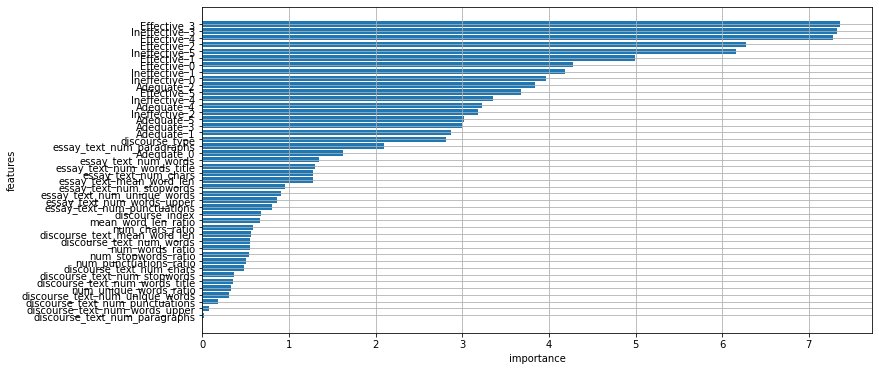

fold1 : CV=0.5882


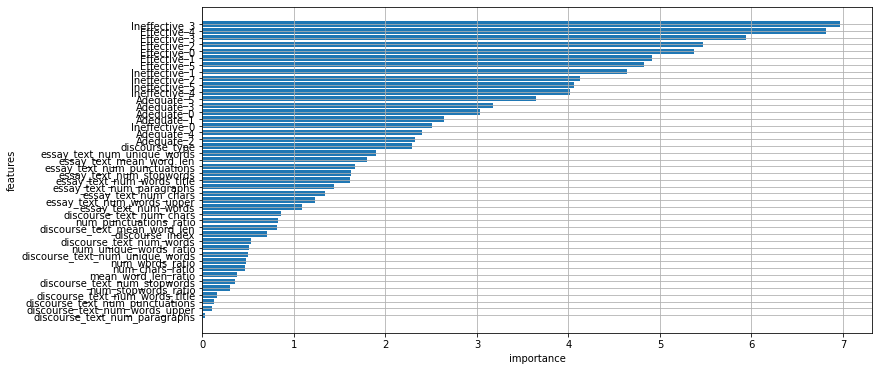

fold2 : CV=0.5723


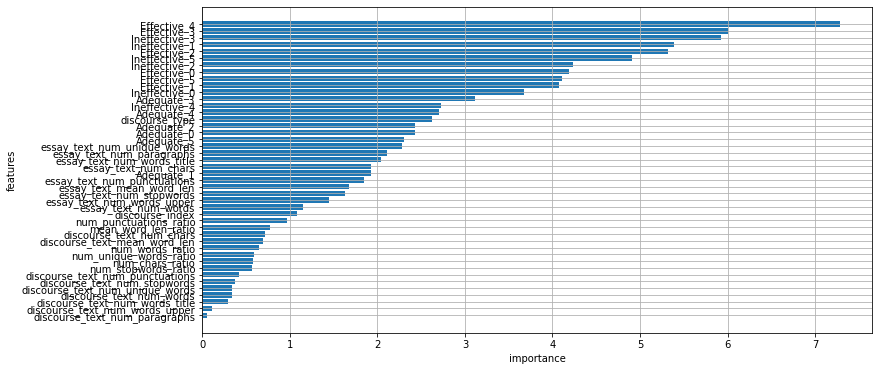

fold3 : CV=0.5911


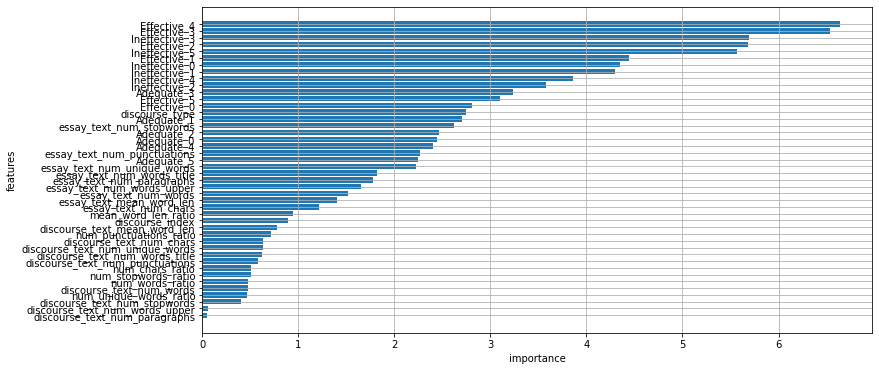

fold4 : CV=0.5798


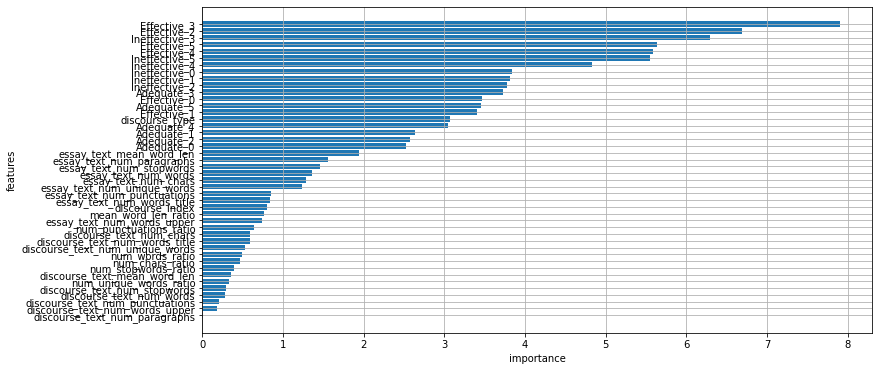

CV=0.5809


In [21]:
from sklearn.metrics import log_loss
import pickle
import os
os.makedirs('./result', exist_ok=True)

cols = [
    'discourse_type', 
    
    'discourse_text_num_words',
    'discourse_text_num_unique_words',
    'discourse_text_num_chars',
    'discourse_text_num_stopwords',
    'discourse_text_num_punctuations', 
    'discourse_text_num_words_upper',
    'discourse_text_num_words_title',
    'discourse_text_mean_word_len',
    'discourse_text_num_paragraphs',

    'essay_text_num_words',
    'essay_text_num_unique_words',
    'essay_text_num_chars',
    'essay_text_num_stopwords', 
    'essay_text_num_punctuations',
    'essay_text_num_words_upper',
    'essay_text_num_words_title',
    'essay_text_mean_word_len',
    'essay_text_num_paragraphs',
    
    'discourse_index',
    'num_words_ratio',
    'num_unique_words_ratio',
    'num_chars_ratio',
    'num_stopwords_ratio', 
    'num_punctuations_ratio',
    'mean_word_len_ratio'
] + cols
cat_features = [0]

score_list = []
oof_df = []
for fold in range(args.num_fold):
    trn_df = train_df[train_df['essay_id'].isin(trn_ids_list[fold])].reset_index(drop=True)
    val_df = train_df[train_df['essay_id'].isin(val_ids_list[fold])].reset_index(drop=True)

    pool_trn = catboost.Pool(trn_df[cols].values, label=trn_df['label'].values, cat_features=cat_features)
    pool_val = catboost.Pool(val_df[cols].values, label=val_df['label'].values, cat_features=cat_features)

    model = catboost.CatBoostClassifier(**params)
    model.fit(pool_trn, 
              eval_set=[pool_val], 
              verbose=0, 
              early_stopping_rounds=100,
             )

    pred = model.predict(pool_val, prediction_type='Probability')
    target = val_df['label'].values
    score = log_loss(target, pred, labels=[0,1,2])
    print('fold{} : CV={:.4f}'.format(fold, score))
    score_list.append(score)
    val_df['oof_ineffective'] = pred[:,0]
    val_df['oof_adequate'] = pred[:,1]
    val_df['oof_effective'] = pred[:,2]
    oof_df.append(val_df)
    # save model
    joblib.dump(model, f'./result/cat_fold{fold}.joblib')
    # plot
    show_feature_importance(model)
    
CV = sum(score_list) / len(score_list)
print('CV={:.4f}'.format(CV))

In [22]:
oof_df = pd.concat(oof_df).reset_index(drop=True)
oof_df = train_df[['discourse_id']].merge(oof_df, on='discourse_id', how='left')
oof_df.to_csv(f'./result/oof_cat.csv', index=False)
print(oof_df.shape)
oof_df.head()

(36765, 57)


,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,Ineffective_0,Adequate_0,Effective_0,label,loss,...,essay_text_num_paragraphs,num_words_ratio,num_unique_words_ratio,num_chars_ratio,num_stopwords_ratio,num_punctuations_ratio,mean_word_len_ratio,oof_ineffective,oof_adequate,oof_effective
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,0.002175,0.152980,0.011512,1,0.085691,...,5,0.190883,0.292517,0.174559,0.196809,0.195652,0.903866,0.042229,0.908038,0.049733
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,0.009333,0.152729,0.004605,1,0.087332,...,5,0.116809,0.197279,0.115639,0.132979,0.086957,0.998485,0.094274,0.868827,0.036899
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,0.023451,0.141358,0.001857,1,0.164698,...,5,0.059829,0.129252,0.057819,0.069149,0.000000,0.968944,0.184011,0.794365,0.021625
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,0.055733,0.109495,0.001439,1,0.420119,...,5,0.205128,0.367347,0.199339,0.202128,0.282609,0.975673,0.284993,0.701474,0.013533
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,0.041290,0.124674,0.000703,1,0.290297,...,5,0.051282,0.102041,0.055617,0.053191,0.021739,1.116977,0.331335,0.658878,0.009787


In [23]:
cols = [col for col in oof_df.columns if col.startswith('oof_')]

oof_score = log_loss(oof_df['label'].values, oof_df[cols].values, labels=[0,1,2])
print('oof={:.4f}'.format(oof_score))

oof=0.5809
